In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('US Superstore data.xls')

print(df.head())
print(df.isnull().sum())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [30]:
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month-Year'] = df['Order Date'].dt.to_period('M')

/var/folders/s1/j1lr__816ks_mg4_h_l5z27h0000gn/T/ipykernel_92157/565759711.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



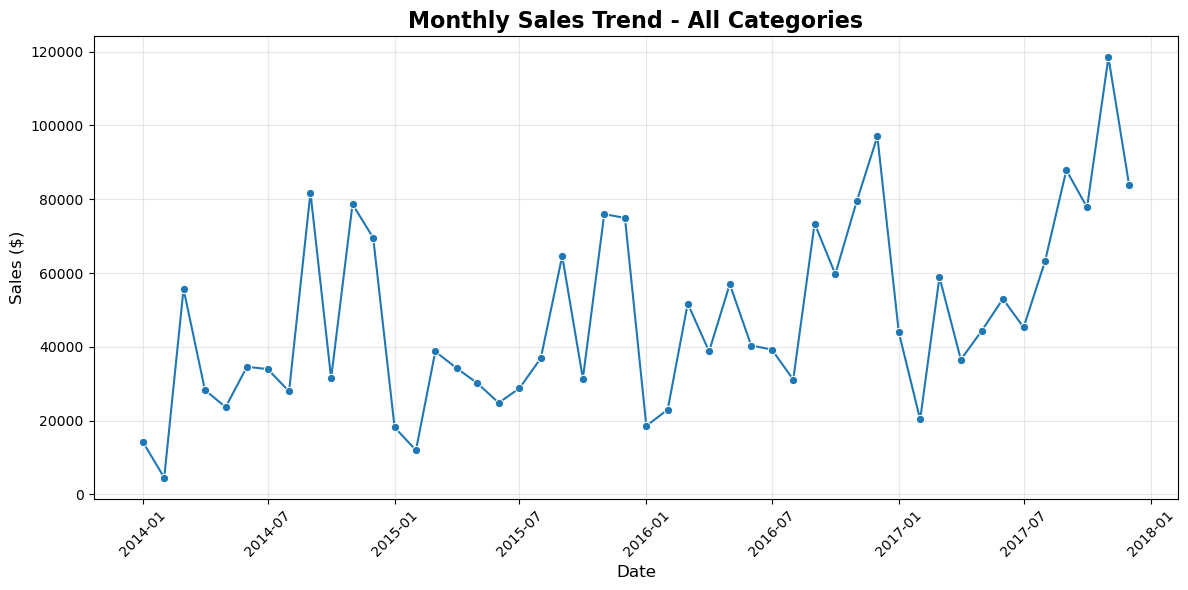

In [31]:
monthly_sales = df.groupby(['Order Month-Year'])['Sales'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Order Month-Year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker="o", palette="viridis")
plt.title('Monthly Sales Trend - All Categories', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [36]:
import plotly.express as px
from ipywidgets import Dropdown, interact
use_cols = ["Country", "Sales", "Profit"]
data = df[use_cols].dropna(subset=["Country"]).copy()

# Aggregate by country
country_agg = (
    data.groupby("Country", as_index=False)
        .agg(Sales=("Sales", "sum"),
             Profit=("Profit", "sum"),
             Orders=("Sales", "count"))
)

# --- 2) Interactive choropleth ---
def plot_map(metric="Sales"):
    # metric can be "Sales" or "Profit"
    title = f"{metric} by Country"
    fig = px.choropleth(
        country_agg,
        locations="Country",
        locationmode="country names",   # accepts country names directly
        color=metric,
        color_continuous_scale="Viridis",
        hover_name="Country",
        hover_data={"Sales": ":,.0f", "Profit": ":,.0f", "Orders": True},
        title=title,
        width=950, height=520,
    )
    # optional: nicer layout
    fig.update_layout(
        margin=dict(l=10, r=10, t=60, b=10),
        coloraxis_colorbar=dict(title=metric)
    )
    fig.show()

# Widget to switch metric
metric_dd = Dropdown(options=["Sales", "Profit"], value="Sales", description="Metric:")
interact(plot_map, metric=metric_dd)


interactive(children=(Dropdown(description='Metric:', options=('Sales', 'Profit'), value='Sales'), Output()), …

<function __main__.plot_map(metric='Sales')>

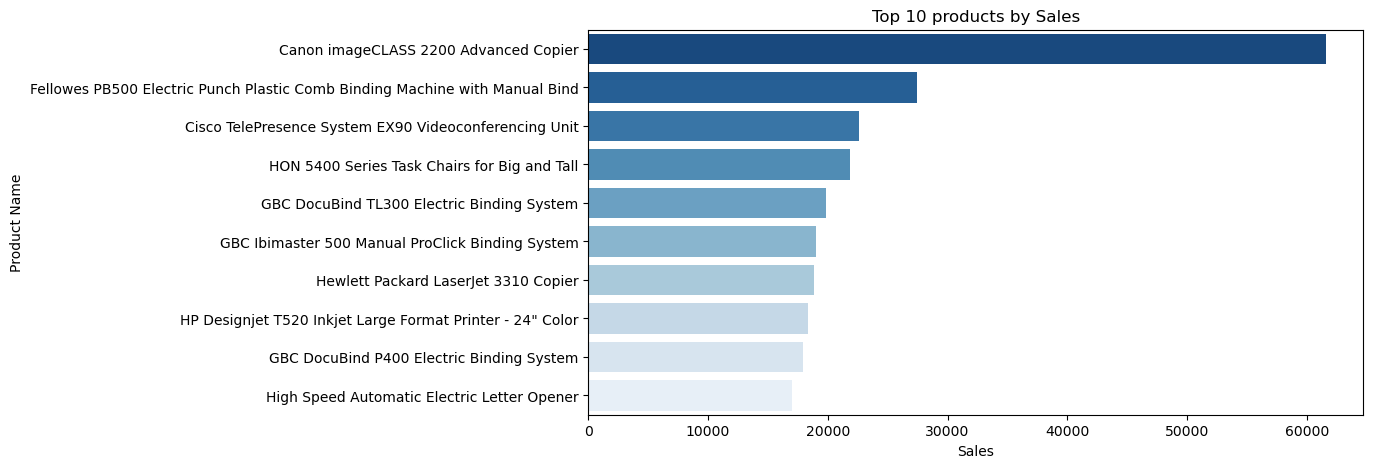

In [33]:


product_summary = df.groupby("Product Name")[["Sales", "Profit"]].sum().reset_index()

product_summary = product_summary.sort_values("Sales", ascending=False)

plt.figure(figsize=(10,5))
top_products = product_summary.head(10)
sns.barplot(data=top_products, x="Sales", y="Product Name", hue="Product Name", palette="Blues_r", legend=False)
plt.title("Top 10 products by Sales")
plt.show()

In [34]:
fig = px.scatter(df, x='Discount', y='Profit', color='Category',
                 hover_data=['Product Name', 'Sales'],
                 title='Interactive Discount vs Profit Analysis (Plotly)')
fig.add_traces(px.scatter(df, x='Discount', y='Profit', trendline='ols').data[1])
fig.show()

In this project I used both Matplotlib and Seaborn. Matplotlib gave me full control and simple interactivity with ipywidgets, so I used it for the time-series trend and the interactive map. Seaborn gave me clean charts very fast and worked well with pandas, so I used it for the top-10 bar chart and the profit–discount scatter. Overall, Seaborn is best for quick, clear visuals, while Matplotlib is better when I need interactivity or a custom layout.

I wrote clear Python code with simple imports, good variable names, and comments for each step (load → clean → transform → visualize). The charts show that sales have several strong peaks over time, the map highlights the main markets by country, a few products drive most sales, and higher discounts often mean lower or negative profit. When needed, I improved readability with labels, rotated x-ticks, a grid, and plt.tight_layout().